🔼 Upload your traditional stats CSV file


Saving nba_traditional_RS_2020_2025.csv to nba_traditional_RS_2020_2025.csv


/tmp/ipython-input-2-2985685163.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='playmaker_score', y='PLAYER', data=top10_playmakers, palette='coolwarm')


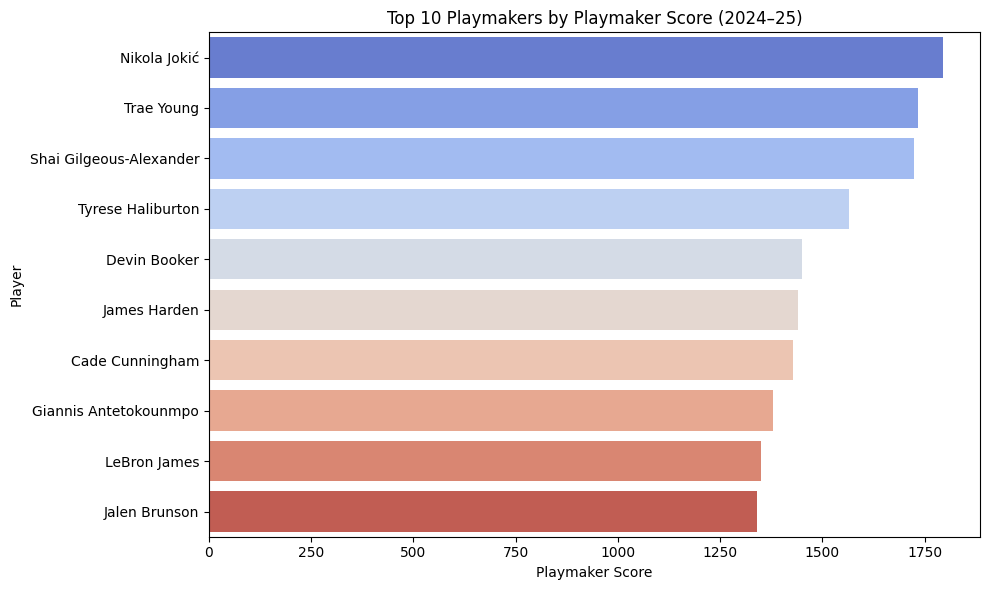

In [2]:
# 📦 Step 1: Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 📁 Step 2: Upload Dataset
print("🔼 Upload your traditional stats CSV file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 📊 Step 3: Load Data
df = pd.read_csv(filename)

# ✅ Step 4: Clean Season Column
df['Season_Type'] = df['Season_Type'].str.replace('%20', ' ', regex=False)
df = df[(df['Season_Type'] == 'Regular Season') & (df['Year'] == '2024-25')]

# 🔢 Step 5: Ensure Numeric Conversion
cols_needed = ['AST', 'AST_TOV', 'PTS', 'TOV']
df[cols_needed] = df[cols_needed].apply(pd.to_numeric, errors='coerce')

# 🧠 Step 6: Calculate Playmaker Score
df['playmaker_score'] = (
    df['AST'] * 1.5 +
    df['AST_TOV'] * 10 +
    df['PTS'] * 0.5 -
    df['TOV'] * 1.5
)

# 🥇 Step 7: Top 10 Playmakers
top10_playmakers = df.sort_values(by='playmaker_score', ascending=False).head(10)

# 💾 Save CSV (Optional)
top10_playmakers.to_csv("top10_playmaker_score_2024_25.csv", index=False)

# 📈 Step 8: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='playmaker_score', y='PLAYER', data=top10_playmakers, palette='coolwarm')
plt.title('Top 10 Playmakers by Playmaker Score (2024–25)')
plt.xlabel('Playmaker Score')
plt.ylabel('Player')
plt.tight_layout()
plt.show()